## Game Data exploration

Date: 10/24/2020

#### Table of Contents
- Imports
- Examine Variables

### Imports and Initial Setup

In [1]:
import sys
import os
sys.path.append(os.environ["nbaModelPath"])

from nbaModels.data.db import nbaDB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
user = os.environ["dbName"]
pw = os.environ["dbPass"]

db = nbaDB(user, pw)


In [3]:
df = db.query_game_data_combined()

In [4]:
df.shape

(36260, 86)

In [5]:
df.head()

,date,season,home_wins,home_losses,away_wins,away_losses,team_home,fgm_home,fga_home,fg_per_home,...,oreb_per_away,dreb_per_away,reb_per_away,ast_per_away,stl_per_away,blk_per_away,tov_per_away,usg_per_away,off_rating_away,def_rating_away
0,1990-11-04,90-91,1,0,1,0,LAC,40,88,0.455,...,31.6,68.5,53.3,57.9,10.1,7.3,23.2,100.0,98.5,100.4
1,1990-11-12,90-91,1,4,1,3,NJN,33,96,0.344,...,38.8,65.5,53.3,47.4,7.0,14.9,13.8,100.0,97.5,92.5
2,1990-11-13,90-91,2,2,3,3,UTA,32,84,0.381,...,34.0,73.9,52.5,51.4,6.8,10.4,10.9,100.0,94.6,92.4
3,1990-11-16,90-91,4,2,3,4,PHO,45,99,0.455,...,28.8,61.7,43.4,72.1,11.5,7.4,12.0,100.0,97.7,107.4
4,1990-11-17,90-91,5,3,5,3,NYK,46,85,0.541,...,22.4,75.7,45.3,45.5,4.3,1.4,13.3,100.0,84.5,113.4


In [6]:
db.query_game_data_by_team().shape

(72520, 46)

### Variable Exploration

In [7]:
df[df["home_wins"] == -1]

,date,season,home_wins,home_losses,away_wins,away_losses,team_home,fgm_home,fga_home,fg_per_home,...,oreb_per_away,dreb_per_away,reb_per_away,ast_per_away,stl_per_away,blk_per_away,tov_per_away,usg_per_away,off_rating_away,def_rating_away


In [8]:
df.columns


Index(['date', 'season', 'home_wins', 'home_losses', 'away_wins',
       'away_losses', 'team_home', 'fgm_home', 'fga_home', 'fg_per_home',
       'x3pa_home', 'x3pm_home', 'x3p_per_home', 'fta_home', 'ftm_home',
       'ft_per_home', 'orebs_home', 'drebs_home', 'rebounds_home',
       'assists_home', 'steals_home', 'blocks_home', 'turnovers_home',
       'fouls_home', 'points_home', 'x1q_pts_home', 'x2q_pts_home',
       'x3q_pts_home', 'x4q_pts_home', 'ot_pts_home', 'pace_home',
       'efg_per_home', 'ft_per_fga_home', 'ts_per_home', 'x3p_ar_home',
       'ft_ar_home', 'oreb_per_home', 'dreb_per_home', 'reb_per_home',
       'ast_per_home', 'stl_per_home', 'blk_per_home', 'tov_per_home',
       'usg_per_home', 'off_rating_home', 'def_rating_home', 'team_away',
       'fgm_away', 'fga_away', 'fg_per_away', 'x3pa_away', 'x3pm_away',
       'x3p_per_away', 'fta_away', 'ftm_away', 'ft_per_away', 'orebs_away',
       'drebs_away', 'rebounds_away', 'assists_away', 'steals_away',
       'b

In [9]:
# Generate which team one for plots
df["winner"] = df["points_home"] > df["points_away"]
df["winner"] = df["winner"].apply(lambda x: "HOME" if x is True else "Away")

[Text(0.5, 0, 'Home True Shooting %'),
 Text(0, 0.5, 'Away True Shooting %'),
 Text(0.5, 1.0, 'True Shooting %')]

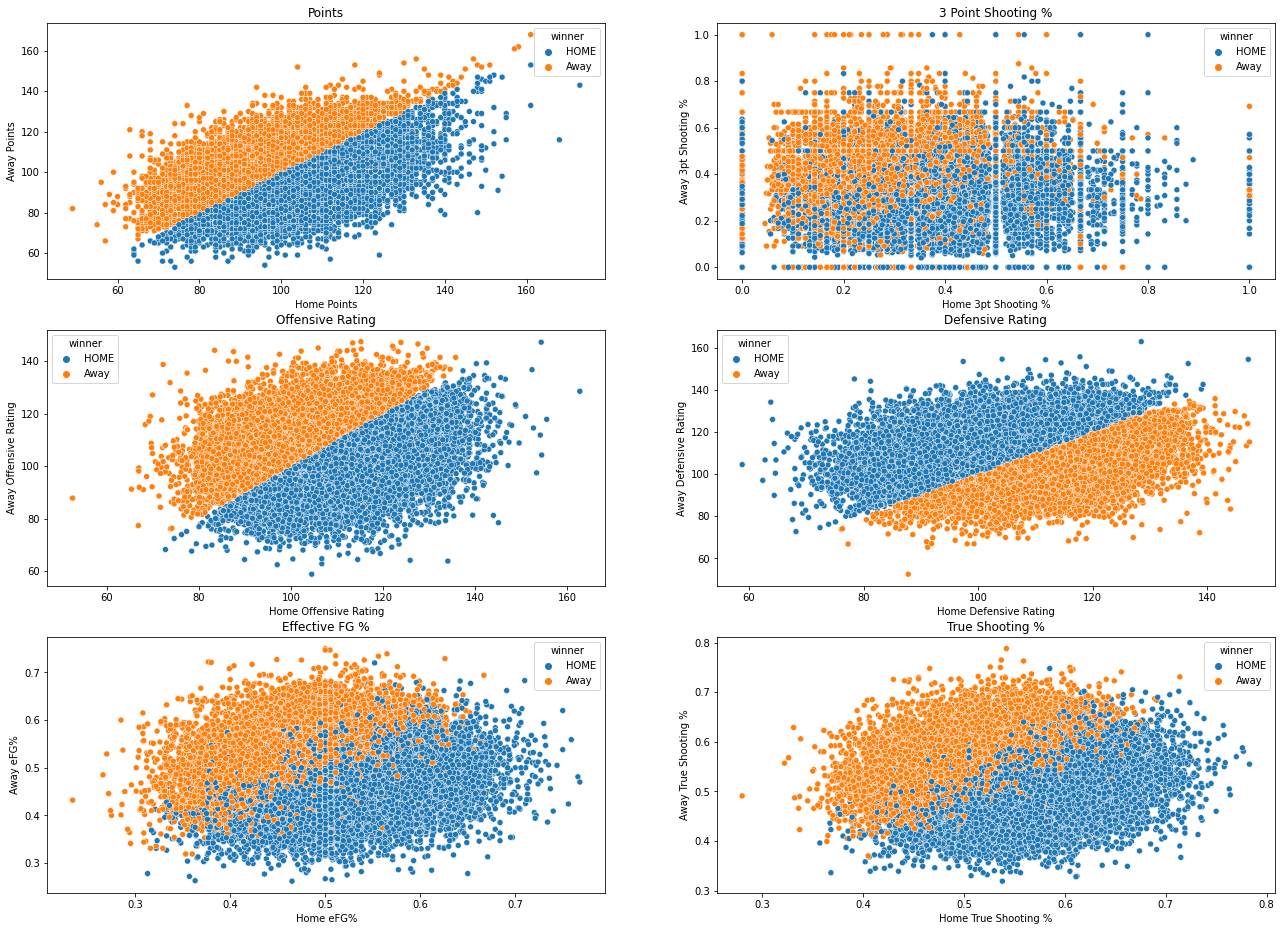

In [10]:
_, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (22,16))
sns.scatterplot(data = df, x = df["points_home"], y = df["points_away"], hue = df["winner"], ax = ax1)
ax1.set(xlabel = "Home Points", ylabel = "Away Points", title = "Points")
sns.scatterplot(data = df, x = df["x3p_per_home"], y = df["x3p_per_away"], hue = df["winner"], ax = ax2)
ax2.set(xlabel = "Home 3pt Shooting %", ylabel = "Away 3pt Shooting %", title = "3 Point Shooting %")
sns.scatterplot(data = df, x = df["off_rating_home"], y = df["off_rating_away"], hue = df["winner"], ax = ax3)
ax3.set(xlabel = "Home Offensive Rating", ylabel = "Away Offensive Rating", title = "Offensive Rating")
sns.scatterplot(data = df, x = df["def_rating_home"], y = df["def_rating_away"], hue = df["winner"], ax = ax4)
ax4.set(xlabel = "Home Defensive Rating", ylabel = "Away Defensive Rating", title = "Defensive Rating")
sns.scatterplot(data = df, x = df["efg_per_home"], y = df["efg_per_away"], hue = df["winner"], ax = ax5)
ax5.set(xlabel = "Home eFG%", ylabel = "Away eFG%", title = "Effective FG %")
sns.scatterplot(data = df, x = df["ts_per_home"], y = df["ts_per_away"], hue = df["winner"], ax = ax6)
ax6.set(xlabel = "Home True Shooting %", ylabel = "Away True Shooting %", title = "True Shooting %")

[Text(0.5, 0, 'Home Rebound'),
 Text(0, 0.5, 'Away Rebound'),
 Text(0.5, 1.0, 'Rebounds')]

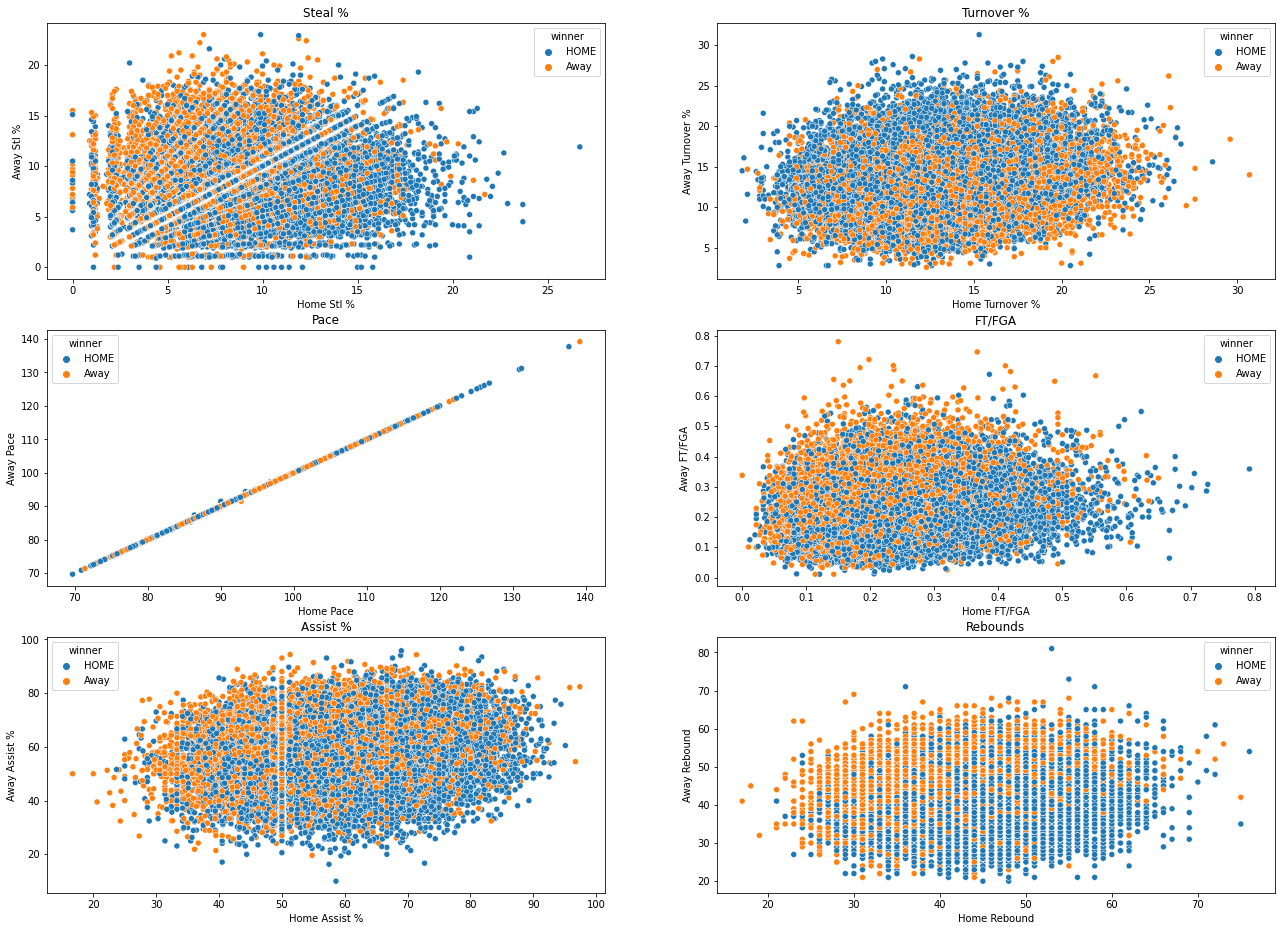

In [11]:
_, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (22,16))
sns.scatterplot(data = df, x = df["stl_per_home"], y = df["stl_per_away"], hue = df["winner"], ax = ax1)
ax1.set(xlabel = "Home Stl %", ylabel = "Away Stl %", title = "Steal %")
sns.scatterplot(data = df, x = df["tov_per_home"], y = df["tov_per_away"], hue = df["winner"], ax = ax2)
ax2.set(xlabel = "Home Turnover %", ylabel = "Away Turnover %", title = "Turnover %")
sns.scatterplot(data = df, x = df["pace_home"], y = df["pace_away"], hue = df["winner"], ax = ax3)
ax3.set(xlabel = "Home Pace", ylabel = "Away Pace", title = "Pace")
sns.scatterplot(data = df, x = df["ft_per_fga_home"], y = df["ft_per_fga_away"], hue = df["winner"], ax = ax4)
ax4.set(xlabel = "Home FT/FGA", ylabel = "Away FT/FGA", title = "FT/FGA")
sns.scatterplot(data = df, x = df["ast_per_home"], y = df["ast_per_away"], hue = df["winner"], ax = ax5)
ax5.set(xlabel = "Home Assist %", ylabel = "Away Assist %", title = "Assist %")
sns.scatterplot(data = df, x = df["rebounds_home"], y = df["rebounds_away"], hue = df["winner"], ax = ax6)
ax6.set(xlabel = "Home Rebound", ylabel = "Away Rebound", title = "Rebounds")

### Get last 5 games home and away team code

In [16]:
all_games = db.query_game_data_by_team()
home = all_games[all_games.home==True].sort_values(by=["team", "date"])
away = all_games[all_games.home==False].sort_values(by=["team", "date"])

In [186]:
all_games_test = all_games[all_games.season.isin(["17-18", "18-19"])].sort_values(by=["date", "team"])
all_games_train = all_games[~all_games.season.isin(["17-18", "18-19"])].sort_values(by=["date", "team"])
game_ids_train = all_games_train.id.unique()
game_ids_test = all_games_test.id.unique()

### Fill NaN

In [315]:
from sklearn.preprocessing import MinMaxScaler
non_numeric_cols = ["team", "id", "date", "season", "home"]
extra_cols = ["wins", "losses"]
num_cols = [c for c in all_games_train if c not in non_numeric_cols+extra_cols]

all_games_train[num_cols] = all_games_train[num_cols].fillna(0)


,id,date,season,home,team,fgm,fga,fg_per,x3pa,x3pm,...,reb_per,ast_per,stl_per,blk_per,tov_per,usg_per,off_rating,def_rating,wins,losses
232,199011020ATL,1990-11-02,90-91,True,ATL,45,90,0.500,7,3,...,48.5,64.4,7.8,15.4,11.0,100.0,112.1,108.2,0,0
230,199011020BOS,1990-11-02,90-91,True,BOS,54,87,0.621,0,0,...,54.2,70.4,6.7,10.3,18.0,100.0,120.0,96.9,0,0
228,199011020CHH,1990-11-02,90-91,True,CHH,49,102,0.480,8,5,...,50.6,67.3,5.5,3.7,10.8,100.0,119.1,122.8,0,0
226,199011020CHI,1990-11-02,90-91,True,CHI,47,101,0.465,12,4,...,44.8,61.7,13.7,7.7,11.2,100.0,113.3,121.1,0,0
231,199011020BOS,1990-11-02,90-91,False,CLE,36,95,0.379,8,2,...,45.8,75.0,9.6,5.7,12.2,100.0,96.9,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67267,201706070CLE,2017-06-07,16-17,False,GSW,40,83,0.482,33,16,...,54.3,72.5,8.0,8.7,16.1,100.0,117.7,112.7,2,0
67268,201706090CLE,2017-06-09,16-17,True,CLE,46,87,0.529,45,24,...,50.6,58.7,6.2,6.3,9.9,100.0,142.6,120.7,0,3
67269,201706090CLE,2017-06-09,16-17,False,GSW,39,87,0.448,39,11,...,49.4,66.7,5.2,14.3,10.4,100.0,120.7,142.6,3,0
67271,201706120GSW,2017-06-12,16-17,False,CLE,47,88,0.534,24,11,...,48.8,46.8,6.1,9.6,12.5,100.0,121.4,130.5,1,3


### Scale numeric_cols

In [316]:
mms = MinMaxScaler()
features = pd.DataFrame(mms.fit_transform(all_games_train.drop(non_numeric_cols+extra_cols, axis = 1)), columns = num_cols)

In [323]:
all_games_train = all_games_train[non_numeric_cols].merge(features, left_index = True, right_index = True)

In [345]:
## This will generate the last N games data concatted into a tensor for both home and away team + the score for the game
def get_model_data(games: pd.DataFrame, nprevious:int):
    for g in games.id.values:
        home_team = games[(games.id == g) & (games.home == True)]
        away_team = games[(games.id == g) & (games.home == False)]

        home_previous = games[(games.date < home_team.date.iloc[0]) & (games.team == home_team.team.iloc[0]) & (games.season == home_team.season.iloc[0])].tail(nprevious)
        away_previous = games[(games.date < away_team.date.iloc[0]) & (games.team == away_team.team.iloc[0]) & (games.season == away_team.season.iloc[0])].tail(nprevious)
        if (home_previous.shape[0] < nprevious) or away_previous.shape[0] < nprevious:
            continue
        home_tensor = torch.tensor(home_previous.drop(drop_cols, axis = 1).values).flatten().float()
        away_tensor = torch.tensor(away_previous.drop(drop_cols, axis = 1).values).flatten().float()
        out_tensor = torch.tensor([home_team.points.values, away_team.points.values]).float()
        yield torch.cat([home_tensor, away_tensor]), out_tensor

In [346]:
gen = get_model_data(all_games_train, 2)

In [347]:
tensors = list()
scores = list()
for i in range(25):
    tensor, score = next(gen)
    tensors.append(tensor)
    scores.append(score)

In [395]:
model = torch.nn.Sequential(
    torch.nn.Linear(156, 1000),
    torch.nn.ReLU(),
    torch.nn.Linear(1000, 2),
)

In [436]:
model(tensors[0])

tensor([0.2412, 0.2726], grad_fn=<AddBackward0>)

In [437]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [438]:
loss = loss_fn(model(tensors[0]), scores[0])

In [439]:
model.zero_grad()
loss.backward()

In [440]:
learning_rate = 1e-3
with torch.no_grad():
    for param in model.parameters():
        param -= learning_rate * param.grad

In [387]:
scores[0]

tensor([[0.3710],
        [0.5081]])